# Project: Investigate a IMDB Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project I am going to conduct analysis on imdb dataset which contains information of movies released from 1966 till 2015. The dataset contains lots of useful information like budjet, revenue, genres, average vote rating and many others. By looking to dataset's features we can draw many useful insights about movie industry in that period. In this analysis I would like to find out answer for following questions:  
            1. Which genres are most popular from year to year?
            2. Which genres are high voted on average over the period?
            3. Which genres has biggest budjet and revenue?
            4. How budget size related to revenue and vote_average rating?
            5. What kinds of properties are associated with movies that has high revenues?
            6. Which movies are most popular?
            7. Which actors/actress is most famous?

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


###### Unecessary columns
From the information about columns of datasets we can realise that not all feature are related or not necesseraly reletad to our analysis. Namely, **imdb_id**, **homepage**, **tagline**, **overview** columns holds information that has no value for out analysis or, in simple words, we can't find out any useful insight from them. For this reason we can drop them to shrink size of dataset for our analysis. You can see resons for each column drop in the following list.
     1. imdb_id - Actually here an arguable thing, we could drop both id columns: id and imdb_id. However, I decided to remove imdb_id because it contains 10 missing values. 
     2. homepage - holds url of website which we don't need
     3. tagline - holds a sentence which don't need
     4. overview - holds a brief description of movie which we don't need

Some example values that is hold by removing columns

In [4]:
df[['imdb_id', 'homepage', 'tagline', 'overview', 'release_year']].head()

,imdb_id,homepage,tagline,overview,release_year
0,tt0369610,http://www.jurassicworld.com/,The park is open.,Twenty-two years after the events of Jurassic ...,2015
1,tt1392190,http://www.madmaxmovie.com/,What a Lovely Day.,An apocalyptic story set in the furthest reach...,2015
2,tt2908446,http://www.thedivergentseries.movie/#insurgent,One Choice Can Destroy You,Beatrice Prior must confront her inner demons ...,2015
3,tt2488496,http://www.starwars.com/films/star-wars-episod...,Every generation has a story.,Thirty years after defeating the Galactic Empi...,2015
4,tt2820852,http://www.furious7.com/,Vengeance Hits Home,Deckard Shaw seeks revenge against Dominic Tor...,2015


As you can see imdb_id conatians 10 missing values

In [5]:
df['imdb_id'].isnull().sum()

10

In [6]:
df['release_date'].head()

0      6/9/15
1     5/13/15
2     3/18/15
3    12/15/15
4      4/1/15
Name: release_date, dtype: object

Although **release_date** is in incorrect format and type but we can eventually make more use of it after proper wrangling than **release_year**

###### Dealing with null values in columns
Below we can see that the columns that misses values are : **cast**, **director**, **keywords**, **genres**, **production_companies** except homepage, tagline, overiew. Because anyway those columns will be dropped. Then we should drop rows that missing values.

In [7]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

###### Dealing with Duplicated rows



In [8]:
df.duplicated().sum()

1

As you can see we have only one duplicated row. We are gonna keep first and drop next duplicated row

###### Dealing with incorrect types and format
In the dataset we have **release_date** which has incorrect datatype and format

In [9]:
df['release_date'].head()

0      6/9/15
1     5/13/15
2     3/18/15
3    12/15/15
4      4/1/15
Name: release_date, dtype: object

We are going to convert to datetime type and ISO format

###### Dealing with multivalued columns 
As you can see below, we have fields like **cast**, **production_companies**, **genres**, and **keywords** which have multiple values separated by '|' in a cell. I am going to separate each of the fields to a new data frame containing id and their proper values in the way that each cell contains only one value.

In [10]:
df[['genres','keywords', 'production_companies', 'cast']].head()

,genres,keywords,production_companies,cast
0,Action|Adventure|Science Fiction|Thriller,monster|dna|tyrannosaurus rex|velociraptor|island,Universal Studios|Amblin Entertainment|Legenda...,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
1,Action|Adventure|Science Fiction|Thriller,future|chase|post-apocalyptic|dystopia|australia,Village Roadshow Pictures|Kennedy Miller Produ...,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...
2,Adventure|Science Fiction|Thriller,based on novel|revolution|dystopia|sequel|dyst...,Summit Entertainment|Mandeville Films|Red Wago...,Shailene Woodley|Theo James|Kate Winslet|Ansel...
3,Action|Adventure|Science Fiction|Fantasy,android|spaceship|jedi|space opera|3d,Lucasfilm|Truenorth Productions|Bad Robot,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...
4,Action|Crime|Thriller,car race|speed|revenge|suspense|car,Universal Pictures|Original Film|Media Rights ...,Vin Diesel|Paul Walker|Jason Statham|Michelle ...


### Data Cleaning

###### Unecessary columns
We are going to drop **imdb_id**, **homepage**, **tagline**, **overview**, **release_year** fields as we discussed above

In [11]:
print(f'Before: {df.shape[1]} columns')
df.drop(['imdb_id', 'homepage', 'tagline', 'overview'], axis=1, inplace=True)
print(f'After Drop: {df.shape[1]} columns')

Before: 21 columns
After Drop: 17 columns


###### Dropping null values

In [12]:
print(f'Number of null values before drop: {df.isnull().sum().sum()}')
df.dropna(how = 'any', inplace = True)
print(f'Number of null values before drop:{df.isnull().sum().sum()}')

Number of null values before drop: 2666
Number of null values before drop:0


###### Dropping duplicated rows

In [13]:
print(f'Number of duplicated values before drop: {df.duplicated().sum()}')
df.drop_duplicates(keep= 'first',inplace = True)
print(f'Number of duplicated values before drop:{df.duplicated().sum()}')

Number of duplicated values before drop: 1
Number of duplicated values before drop:0


###### Converting to correct datatypes
In the dataframe, we have column **release_date** which has incorrect date type - string. We need to convert it to proper data type and format before starting anaylsis. Because earlier we dropped **release_year** column because it hold redundant data which can be found in **release_date** column. Except that I don't need any column that needs conversion to better format.

In [14]:
df['release_date']=pd.to_datetime(df['release_date'])
df['release_date'].mask(df['release_date'].dt.year > 2015, (df['release_date'] - pd.to_timedelta(100, unit='y') + pd.to_timedelta(12, unit='h')), inplace=True)
df['release_date'] = df['release_date'].dt.date
df['release_date'].head()

0    2015-06-09
1    2015-05-13
2    2015-03-18
3    2015-12-15
4    2015-04-01
Name: release_date, dtype: object

In the code cell above, **mask** operation is used for replacing incorrect year values of **release_date** after changing its data type to datetime type. After conversion to datetime, there were year way bigger than 2015, namely, 2066. 2066 is 1966 in the dataset with original type. And the biggest value for year is 2015 in original dateset. Therefore, I changed those incorrect years with its correct values by using **mask** function. It takes condition as first parameter, and replacing value as second parameter. In our case condition is ```df['release_date'].dt.year > 2015``` and ```(df['release_date'] - pd.to_timedelta(100, unit='y') + pd.to_timedelta(12, unit='h'))``` is replacing value. If condition is true then replacement is done. 

###### Dealing with multivalue columns
There are fields which holds multiple values in a cell. Namely, **genres**, **production_companies**, **cast**, and **keywords**. We are going  to create seperate dataframes for every these multivalue fields. The new genres dataframe will contain **id**, **genres** fields and **genre** will contain single value. 

In [15]:
def custom_split(data):
    return data.str[0:].str.split('|',expand = True)

The function above is used in spliting each genres and production_companies to individual column

In [16]:
genres = custom_split(df['genres'])
production_companies = custom_split(df['production_companies'])
keywords = custom_split(df['keywords'])
cast = custom_split(df['cast'])

In [17]:
genres.head()

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


In [18]:
production_companies.head()

,0,1,2,3,4
0,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None
2,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,None
3,Lucasfilm,Truenorth Productions,Bad Robot,None,None
4,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films


Next step is copying **id** column from **df** to each newly created dataframes: **genres**, **production_companies**, **keywords**, **cast**. 

In [19]:
production_companies['id'] = df['id']
genres['id'] = df['id']
keywords['id'] = df['id']
cast['id'] = df['id']

In [20]:
genres.head()

,0,1,2,3,4,id
0,Action,Adventure,Science Fiction,Thriller,None,135397
1,Action,Adventure,Science Fiction,Thriller,None,76341
2,Adventure,Science Fiction,Thriller,None,None,262500
3,Action,Adventure,Science Fiction,Fantasy,None,140607
4,Action,Crime,Thriller,None,None,168259


In the following code cell, we have done melting procedure of pandas so that we will have separate columns with single values in it. For exampe, genres dataframe above have 4 seperate columns for each types of genre types. For that dataframe we are going to make variable and genre columns holding column numbers and genre values, respectively

In [21]:
genres = pd.melt(genres,col_level = 0,id_vars = 'id',value_vars = [0,1,2,3,4], value_name='genre')
production_companies = pd.melt(production_companies, col_level = 0,id_vars = 'id',value_vars = [0,1,2,3,4], value_name='production_company')
keywords = pd.melt(keywords,col_level = 0,id_vars = 'id',value_vars = [0,1,2,3,4], value_name='keywords')
cast = pd.melt(cast, col_level = 0,id_vars = 'id',value_vars = [0,1,2,3,4], value_name='cast')

In [22]:
genres.head()

,id,variable,genre
0,135397,0,Action
1,76341,0,Action
2,262500,0,Adventure
3,140607,0,Action
4,168259,0,Action


Since we don't need varaible column in dataframes so we'll drop them.

In [23]:
genres.drop('variable',axis=1, inplace=True)
production_companies.drop('variable',axis=1, inplace=True)
keywords.drop('variable',axis=1, inplace=True)
cast.drop('variable',axis=1, inplace=True)

In [24]:
genres.head()

,id,genre
0,135397,Action
1,76341,Action
2,262500,Adventure
3,140607,Action
4,168259,Action


Now, we'll clean the dataframes from NaN values. We will drop rows containing NaN values

In [25]:
genres.dropna(inplace=True)
production_companies.dropna(inplace=True)
keywords.dropna(inplace=True)
cast.dropna(inplace=True)

print("Number of null values in genres: {}".format(genres.isnull().sum().sum()))
print("Number of null values in production_companies: {}".format(production_companies.isnull().sum().sum()))
print("Number of null values in genres: {}".format(keywords.isnull().sum().sum()))
print("Number of null values in production_companies: {}".format(cast.isnull().sum().sum()))

Number of null values in genres: 0
Number of null values in production_companies: 0
Number of null values in genres: 0
Number of null values in production_companies: 0


Since we created seperate dataframes for multivalued columns, we drop them in main dataframe and make new reference for it

In [26]:
films = df.drop(columns = ['production_companies', 'genres', 'keywords', 'cast'],axis = 1)

###### Cleaning from meaningless data
Removing  all rows with runtime equals to zero or smaller than it

In [27]:
zero_runtime_arr = df.query('runtime <= 0').index.values
zero_runtime_arr

array([  92,  334,  486, 1289, 1293, 5920, 5938], dtype=int64)

In [28]:
df.drop(labels = zero_runtime_arr, inplace=True)

So far, after cleaning we have following dataframes : **df**, **films**, **genres**, **keywords**, **cast**, **production_companies**.

<a id='eda'></a>
## Exploratory Data Analysis

###  1. Which genres are most popular from year to year? 

To answer this question first we need to merge two dataframes: **films** and **genres**. We merge them on ids of two frames.

In [29]:
genres_and_films = pd.merge(films , genres , how = 'inner' , on = 'id')
genres_and_films.head()

,id,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
2,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
3,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
4,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action


Then, we need to find out number of genres in each years. To achieve that we need to group by dataframe by release_year and count uniques values of genres for each year. To give name for column of count we use reset_index(name='counts') function

In [30]:
group_by_year_data = genres_and_films.groupby('release_year')['genre'].value_counts().reset_index(name = 'counts')
group_by_year_data.head()

,release_year,genre,counts
0,1960,Drama,12
1,1960,Action,7
2,1960,Comedy,7
3,1960,Horror,7
4,1960,Thriller,6


Now we need to find most used genres each year.

In [31]:
years_set = {*group_by_year_data.release_year}
data1 = pd.DataFrame([], columns=['release_year', 'genre', 'counts'])
for year in years_set:
    year_df = group_by_year_data.query('release_year == @year')
    max_count = year_df.counts.max()
    df1 = year_df.query('counts == @max_count')
    data1 = data1.append(df1)

**data1** dataframe contains most popular genres each year 

In [32]:
data1.head()

,release_year,genre,counts
0,1960,Drama,12
15,1961,Drama,16
32,1962,Drama,19
49,1963,Comedy,13
50,1963,Drama,13


Now we need to find out most popular genres during that period by using **values_counts** function

In [33]:
data1.genre.value_counts()

Drama       50
Comedy      10
Thriller     1
Name: genre, dtype: int64

**Answer:** Dramma and Comedy are the most popular genres between 1960 and 2015 

### 2. Which genres are high voted on average over the period

In [34]:
genre_counts = genres_and_films.groupby('release_year').genre.value_counts()
total_votes = genres_and_films.groupby(['release_year','genre'])['vote_average'].sum()
genre_counts.head()

release_year  genre   
1960          Drama       12
              Action       7
              Comedy       7
              Horror       7
              Thriller     6
Name: genre, dtype: int64

In [35]:
total_votes.head()

release_year  genre    
1960          Action       43.5
              Adventure    33.4
              Comedy       43.3
              Crime        11.8
              Drama        76.7
Name: vote_average, dtype: float64

In [36]:
average_each_year = total_votes / genre_counts
average_each_year.head()

release_year  genre    
1960          Action       6.214286
              Adventure    6.680000
              Comedy       6.185714
              Crime        5.900000
              Drama        6.391667
dtype: float64

In [37]:
average_each_year= average_each_year.reset_index(name = 'average_in_year_vote')
max_each_year = average_each_year.sort_values(['release_year', 'average_in_year_vote'], ascending=False).groupby('release_year')['release_year','genre','average_in_year_vote'].head(3)
max_each_year = max_each_year.genre.value_counts()

In [38]:
max_each_year.reset_index(name = 'counts')

,index,counts
0,Documentary,30
1,History,24
2,Music,20
3,Animation,19
4,War,19
5,Family,10
6,Crime,8
7,Western,8
8,Foreign,7
9,Mystery,5


In [39]:
max_each_year.rename(columns = {'index':'genre'}, inplace=True)

Documentary        30
History            24
Music              20
Animation          19
War                19
Family             10
Crime               8
Western             8
Foreign             7
Mystery             5
TV Movie            5
Adventure           3
Romance             2
Fantasy             2
Drama               2
Science Fiction     1
Thriller            1
Comedy              1
Horror              1
dtype: int64

In [45]:
plt.bar(max_each_year.keys(), max_each_year.values)

TypeError: bar() missing 1 required positional argument: 'height'

**ANSWER:** From the results above, we can see that **Documentary**, **History**, **Music**, **Animation**, and **War** genres are highly rated movies per movies on average during the period. 

### 3. Which genres has biggest budjet and revenue?

In [310]:
total_budget_per_genre = genres_and_films.groupby('genre')['budget_adj'].sum()

In [311]:
total_count_per_genre = genres_and_films.groupby('genre').id.count()

In [312]:
total_budget_per_genre.head()

genre
Action       7.644155e+10
Adventure    6.312328e+10
Animation    1.715449e+10
Comedy       5.814729e+10
Crime        2.830856e+10
Name: budget_adj, dtype: float64

In [313]:
total_count_per_genre.head()

genre
Action       2022
Adventure    1271
Animation     512
Comedy       3050
Crime        1200
Name: id, dtype: int64

In [314]:
average_budget_size = total_budget_per_genre / total_count_per_genre

In [315]:
average_budget_size.nlargest(3)

genre
Adventure    4.966427e+07
Fantasy      4.369639e+07
Action       3.780492e+07
dtype: float64

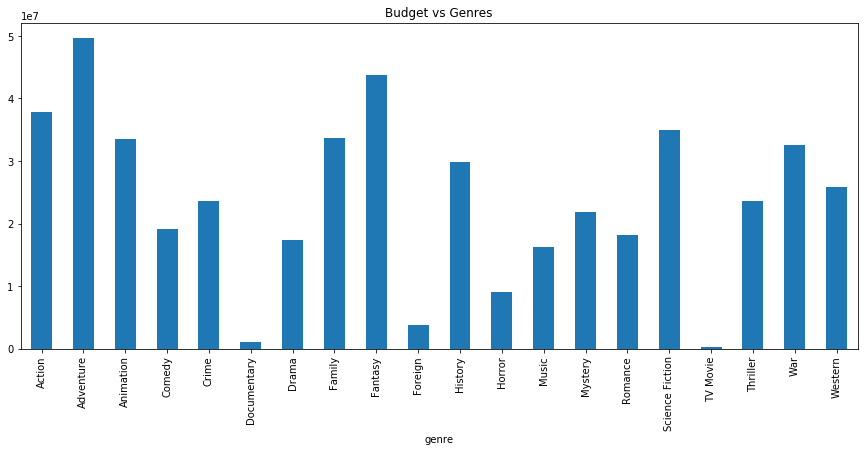

In [316]:
average_budget_size.plot(kind='bar', figsize=(15, 6), title='Budget vs Genres');

From the graph above, we can see that **Adventure**, **Fantasy** and **Action** have biggest budget

In [317]:
total_revenue_per_genre = genres_and_films.groupby('genre')['revenue_adj'].sum()
total_count_per_genre = genres_and_films.groupby('genre')['id'].count()

In [318]:
total_revenue_per_genre.head()

genre
Action       2.166853e+11
Adventure    2.063537e+11
Animation    5.906832e+10
Comedy       1.786213e+11
Crime        7.579447e+10
Name: revenue_adj, dtype: float64

In [319]:
total_count_per_genre.head()

genre
Action       2022
Adventure    1271
Animation     512
Comedy       3050
Crime        1200
Name: id, dtype: int64

In [320]:
average_revenue_size = total_revenue_per_genre / total_count_per_genre
average_revenue_size.nlargest(3)

genre
Adventure    1.623554e+08
Fantasy      1.319748e+08
Animation    1.153678e+08
dtype: float64

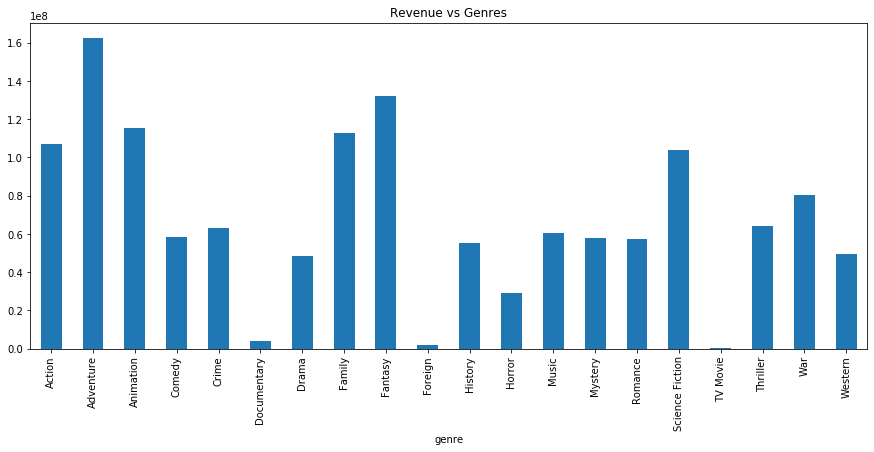

In [321]:
average_revenue_size.plot(kind='bar', figsize=(15, 6), title='Revenue vs Genres');

**ANSWER:** Biggest Budgets are in **Adventure**, **Fantasy** and **Action**. Highest revenues are in **Adventure**, **Fantasy** and **Animation**.

### 4. How budget size related to revenue and vote_average rating?

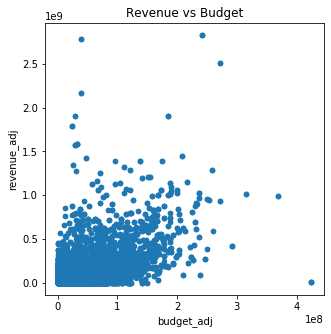

In [322]:
genres_and_films.plot(kind="scatter", x='budget_adj', y='revenue_adj', figsize=(5,5), title="Revenue vs Budget");

In [323]:
genres_and_films.corr()['revenue_adj']['budget_adj']

0.6330231835229215

From the number and scatterplot, we can see that there is **moderate positive** relationship between revenue and budget.

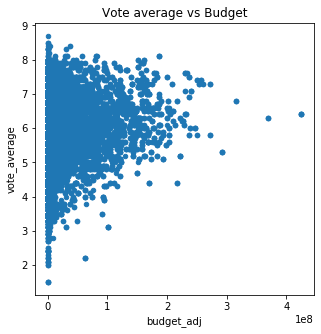

In [324]:
genres_and_films.plot(kind="scatter", x='budget_adj', y='vote_average', figsize=(5,5), title='Vote average vs Budget');

In [325]:
genres_and_films.corr()['vote_average']['budget_adj']

0.12047783132055778

**ANSWER:** From the results above we can see that correlation between vote_average and budget_adj has **weak positive** relationship. In conclusion, budget size doesn't affect too much on vote rating. And there is **moderate positive** relationship between revenue and budget.

### 5. What kinds of properties are associated with movies that has high revenues?

**Note:** By revenue I mean total profit in following analysis. I am going to check relationships between **revenue** and **budget, genre, popularity, cast, director, production_companies, vote_average**. For calculations I am going to use only revenue_adj and budget_adj columns because they have the same inflation percentage.

First we need to add new column **total_profit_adj** which is equal to **revenue_adj - budget_adj**

In [326]:
films['total_profit_adj'] = films['revenue_adj'] - films['budget_adj']
films.head()

,id,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,total_profit_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


###### 5.1 Relationships between total profit and budget

In [327]:
films.corr()['total_profit_adj']['budget_adj']

0.4628394032064401

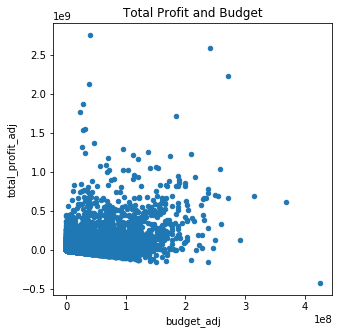

In [328]:
films.plot(kind='scatter', y='total_profit_adj', x='budget_adj', figsize=(5,5), title='Total Profit and Budget');

From the graph and correlation cofficient we can see that there is positive moderate correlation between total_profit_adj and budget_adj.

###### 5.2  Relationships between revenue and genre

In [329]:
genres_and_films = pd.merge(genres, films, how='inner', on='id')
grouped_by_genres=genres_and_films.groupby('genre').sum()
grouped_by_genres.total_profit_adj.nlargest(10)

genre
Adventure          1.432304e+11
Action             1.402438e+11
Drama              1.215195e+11
Comedy             1.204740e+11
Thriller           1.000235e+11
Family             7.483844e+10
Science Fiction    7.054197e+10
Fantasy            6.735644e+10
Romance            5.564065e+10
Crime              4.748591e+10
Name: total_profit_adj, dtype: float64

These genres also has big budget.

In [330]:
grouped_by_genres=genres_and_films.groupby('genre').sum()
grouped_by_genres.budget_adj.nlargest(10)

genre
Action             7.644155e+10
Drama              6.842163e+10
Adventure          6.312328e+10
Comedy             5.814729e+10
Thriller           5.808493e+10
Science Fiction    3.597746e+10
Fantasy            3.334035e+10
Family             3.186485e+10
Crime              2.830856e+10
Romance            2.577141e+10
Name: budget_adj, dtype: float64

We can see that genres that have high total_profits also have big budgets. Action, Drama, Adventure, and Comedy have high revenues and budgets

###### 5.3 Relationships between revenue and popularity

Below we can see that popularity and revenue has a positive moderate correlation. 

In [331]:
films.corr()['total_profit_adj']['popularity']

0.5578078529121172

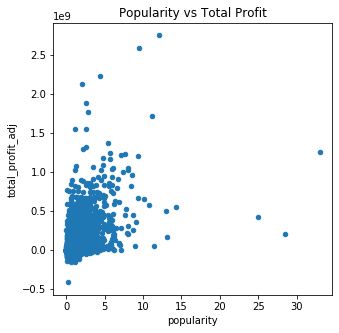

In [332]:
films.plot(kind="scatter", x='popularity', y='total_profit_adj', figsize=(5,5), title = 'Popularity vs Total Profit');

###### 5.4 Which actors and actresses make high revenues

To work with casts we need to first merge cast and films dataframes

In [333]:
cast_and_films = pd.merge(cast, films, how='inner', on='id')

In [334]:
top_20_cast = cast_and_films.groupby('cast').total_profit_adj.max().nlargest(20)
top_20_cast

cast
Alec Guinness         2.750137e+09
Carrie Fisher         2.750137e+09
Harrison Ford         2.750137e+09
Mark Hamill           2.750137e+09
Peter Cushing         2.750137e+09
Michelle Rodriguez    2.586237e+09
Sam Worthington       2.586237e+09
Sigourney Weaver      2.586237e+09
Stephen Lang          2.586237e+09
Zoe Saldana           2.586237e+09
Billy Zane            2.234714e+09
Frances Fisher        2.234714e+09
Kate Winslet          2.234714e+09
Kathy Bates           2.234714e+09
Leonardo DiCaprio     2.234714e+09
Ellen Burstyn         2.128036e+09
Jason Miller          2.128036e+09
Lee J. Cobb           2.128036e+09
Linda Blair           2.128036e+09
Max von Sydow         2.128036e+09
Name: total_profit_adj, dtype: float64

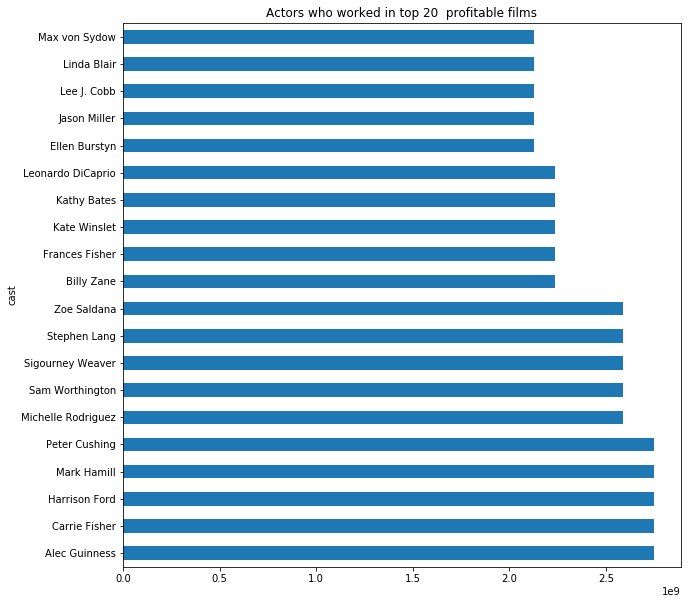

In [335]:
top_20_cast.plot(kind='barh', x='cast', y='total_profit_adj', figsize=(10,10), title="Actors who worked in top 20  profitable films");

**ANSWER:** Alec Guinness, Carrie Fisher, Harrison Ford, Mark Hamill are able to make most profitable movies and others.

###### 5.5  Which directors make high revenues

In [336]:
top_20_directors = films.groupby('director').total_profit_adj.max().nlargest(20)

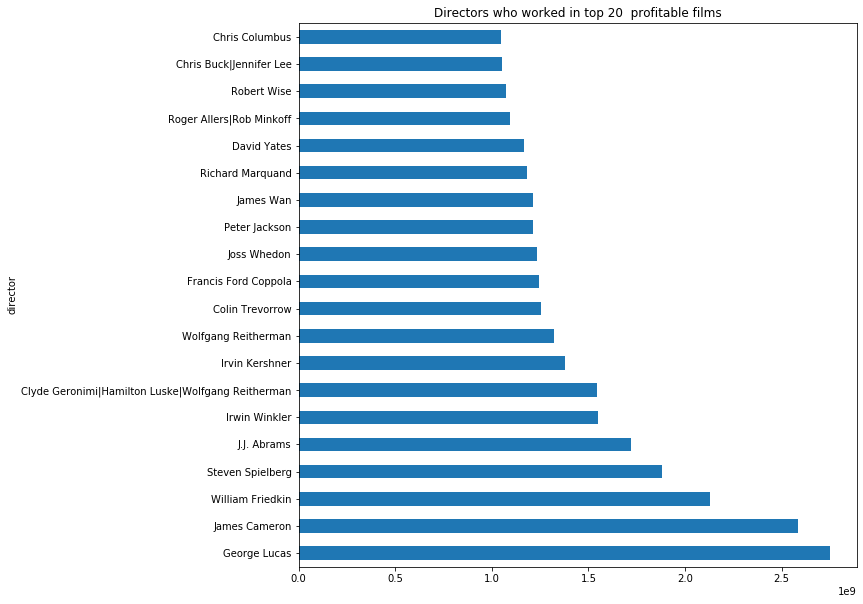

In [337]:
top_20_directors.plot(kind='barh', x='director', y='total_profit_adj', figsize=(10,10),title="Directors who worked in top 20  profitable films");

**ANSWER:** George Lucas, James Cameron, William Friedkin, Steven Spielberg are directors who made high profit films.

###### 5.6 Which companies made most profitable movies

In [338]:
companies_and_films = pd.merge(production_companies, films, how='inner', on='id')
companies_and_films.head()

,id,production_company,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,total_profit_adj
0,135397,Universal Studios,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,135397,Amblin Entertainment,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
2,135397,Legendary Pictures,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
3,135397,Fuji Television Network,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
4,135397,Dentsu,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09


In [339]:
top_20_companies = companies_and_films.groupby('production_company').total_profit_adj.max().nlargest(20)
top_20_companies

production_company
Lucasfilm                                 2.750137e+09
Twentieth Century Fox Film Corporation    2.750137e+09
Dune Entertainment                        2.586237e+09
Ingenious Film Partners                   2.586237e+09
Lightstorm Entertainment                  2.586237e+09
Paramount Pictures                        2.234714e+09
Hoya Productions                          2.128036e+09
Warner Bros.                              2.128036e+09
Universal Pictures                        1.878643e+09
Zanuck/Brown Productions                  1.878643e+09
Amblin Entertainment                      1.767968e+09
Bad Robot                                 1.718723e+09
Truenorth Productions                     1.718723e+09
Columbia Pictures                         1.551568e+09
Walt Disney Productions                   1.545635e+09
Walt Disney Pictures                      1.319404e+09
Dentsu                                    1.254446e+09
Fuji Television Network                   1.25

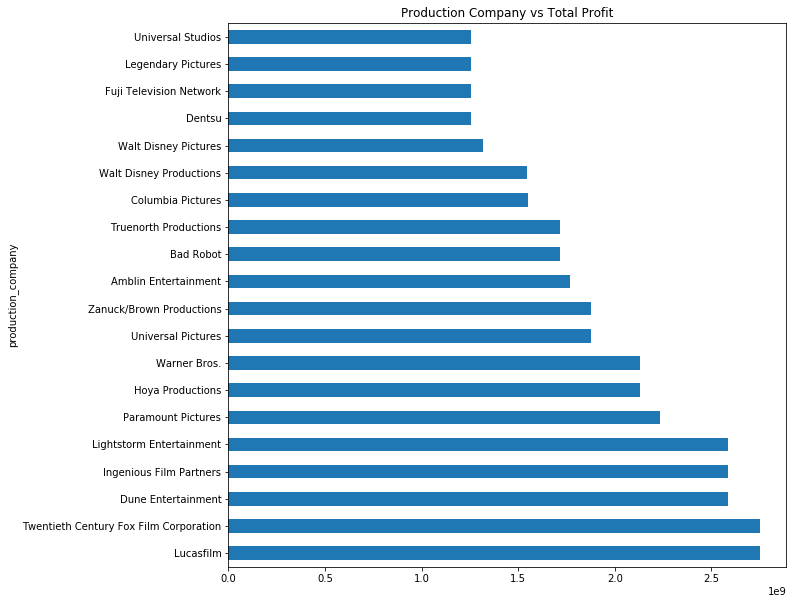

In [340]:
top_20_companies.plot(kind='barh', x='production_company', y='total_profit_adj',figsize=(10,10), title = 'Production Company vs Total Profit');

**ANSWER:** Lucastfilm, Twentieth Century Fox Film Corporation, Dune Entertainment, Ingenios Film Partners and many other made most profitable movies.

###### 5.7 Relationship between vote_average and revenue

In [341]:
films.corr()['vote_average']['total_profit_adj']

0.22312247201035235

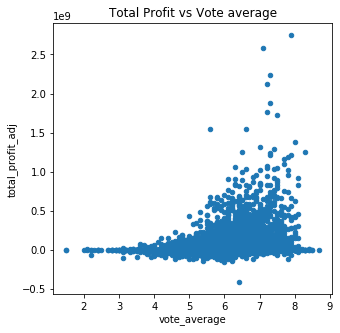

In [342]:
films.plot(kind='scatter', x='vote_average', y='total_profit_adj', figsize=(5,5), title = 'Total Profit vs Vote average')

**ANSWER:** From the graph and correlation cofficient, we can see that there is positive but weak correlation.

###### 6. Which movies are most popular?

In [363]:
films.sort_values(by = 'popularity', ascending = False).loc[:,['original_title','popularity']].head(10)

,original_title,popularity
0,Jurassic World,32.985763
1,Mad Max: Fury Road,28.419936
629,Interstellar,24.949134
630,Guardians of the Galaxy,14.311205
2,Insurgent,13.112507
631,Captain America: The Winter Soldier,12.971027
1329,Star Wars,12.037933
632,John Wick,11.422751
3,Star Wars: The Force Awakens,11.173104
633,The Hunger Games: Mockingjay - Part 1,10.739009


###### 7. Which actors/actress is most famous?

In [365]:
cast_and_films.groupby('cast').sum().sort_values(by = 'popularity' , ascending = False ).loc[:,'popularity'].head(10)

cast
Samuel L. Jackson     91.868694
Michael Caine         82.634623
Harrison Ford         79.035897
Bruce Willis          77.058590
Robert De Niro        76.546720
Brad Pitt             74.716607
Johnny Depp           71.155011
Scarlett Johansson    68.154523
Tom Hardy             66.737589
Tom Hanks             66.540270
Name: popularity, dtype: float64

<a id='conclusions'></a>
## Conclusions

**1. Which genres are most popular from year to year?**

**Answer:** Dramma and Comedy are the most popular genres between 1960 and 2015

**2. Which genres are high voted on average over the period?**

**Answer:** From the results above, we can see that **Documentary**, **History**, **Music**, **Animation**, and **War** genres are highly rated movies per movies on average during the period.

**3. Which genres has biggest budjet and revenue?**

**Answer:** Biggest Budgets are in **Adventure**, **Fantasy** and **Action**. Highest revenues are in **Adventure**, **Fantasy** and **Animation**.

**4. How budget size related to revenue and vote_average rating?**

**Answer:** From the results above we can see that correlation between vote_average and budget_adj has **weak positive** relationship. In conclusion, budget size doesn't affect too much on vote rating. And there is **moderate positive** relationship between revenue and budget.

**5. What kinds of properties are associated with movies that has high revenues?**

**Answer:** 1. Total profit and budget has positive moderate correlation with value 0.4628394032064401
            2. Action, Drama, Adventure, and Comedy have high revenues and budgets
            3. Popularity and revenue has a positive moderate correlation 0.5578078529121172
            4. Alec Guinness, Carrie Fisher, Harrison Ford, Mark Hamill are able to make most profitable movies and others.
            5. George Lucas, James Cameron, William Friedkin, Steven Spielberg are directors who made high profit films.
            6. Lucastfilm, Twentieth Century Fox Film Corporation, Dune Entertainment, Ingenios Film Partners and many other made most profitable movies.
            7. Correlation between vote_average and revenue is positive but weak correlation: 0.22312247201035235

**6. Which movies are most popular?**

**Answer:** Most popular movies are Jurassic World, Mad Max: Fury Road, Interstellar, Guardians of the Galaxy, Insurgent and others

**7. Which actors/actress is most famous?**

**Answer:** Famous actors/actresses are Samuel L. Jackson, Michael Caine, Harrison Ford, Bruce Willis and others